# Introduction {#sec-introduction}

In [10]:
#| label: setup
import matplotlib.pyplot as plt

Panel data, which consists of observations on multiple individuals (such as people, firms, or countries) over multiple time periods, is widely used in econometrics. The inclusion of a temporal dimension in cross-sectional data offers several advantages, such as greater variability than a purely cross-sectional sample, the ability to control for unobservable heterogeneity between individuals, and the opportunity to analyze dynamic effects, conduct event studies, and evaluate policy impacts [@Cameron_Trivedi_2005]. However, despite their widespread use in econometrics, panel data methods share two key limitations with the classic linear model: the treatment of interactions and the assumption of linearity.

## Limitations of Classical Panel Data Models

The reason of the limitations rely on the underlying model behind the estimation. If we think about the specification of a linear fixed or random effects models, we can see the following

The **linear fixed effects model** can be written as:

$$
y_{it} = \alpha_i + \mathbf{x}_{it}'\boldsymbol{\beta} + \varepsilon_{it}
$$

where $y_{it}$ is the outcome variable for individual $i$ at time $t$, $\alpha_i$ the individual-specific intercept (captures unobserved heterogeneity that is constant over time for each individual), $\mathbf{x}_{it}$ the vector of observed explanatory variables for individual $i$ at time $t$, $\boldsymbol{\beta}$ the vector of coefficients associated with $\mathbf{x}_{it}$ and $\varepsilon_{it}$ the idiosyncratic error term.

The **linear random effects model** is specified as:

$$
y_{it} = \alpha + \mathbf{x}_{it}'\boldsymbol{\beta} + u_i + \varepsilon_{it}
$$

where: $\alpha$: overall intercept (common to all individuals), $u_i$: individual-specific random effect (assumed to be uncorrelated with $\mathbf{x}_{it}$) and the other terms are as defined above.

In both models, the key distinction is how the individual-specific effect is treated: as a fixed parameter to be estimated for each individual ($\alpha_i$) in the fixed effects model, or as a random variable ($u_i$) in the random effects model.

Both specifications assume linearity and independence between variables, assumptions that are often unrealistic in practice. A common workaround, as in classical linear regression, is to manually add transformations (to address non-linearity) and interaction terms. Addressing the non-linearity manually can be problematic because it might rely on subjective choices and can lead to model misspecification and lack of interpretability.

Addressing interactions manually quickly becomes impractical as the number of variables increases, because the number of possible interaction terms grows rapidly. For example, with $p$ variables, the number of possible $k$-way interaction terms is given by the binomial coefficient:

$$
\text{Number of $k$-way interactions} = \binom{p}{k}
$$
 
Thus, the total number of possible terms (main effects and all possible interactions, not just two way) in a fully specified linear model is:
$$
\sum_{k=1}^{p} \binom{p}{k} = 2^p - 1
$$

For instance, with $p=5$ variables: Main effects ($k=1$): $\binom{5}{1} = 5$, Two-way interactions ($k=2$): $\binom{5}{2} = 10$, Three-way interactions ($k=3$): $\binom{5}{3} = 10$, Four-way interactions ($k=4$): $\binom{5}{4} = 5$ and Five-way interaction ($k=5$): $\binom{5}{5} = 1$. Leading to a total numbers 31 terms. As $p$ increases, the number of terms grows combinatorially, making it infeasible to specify and interpret all possible interactions in a linear model. A more visual way of this can be seeing this phenomenon can be found in @fig-interaction-terms where the number of interaction terms grows as a function of the number of variables.

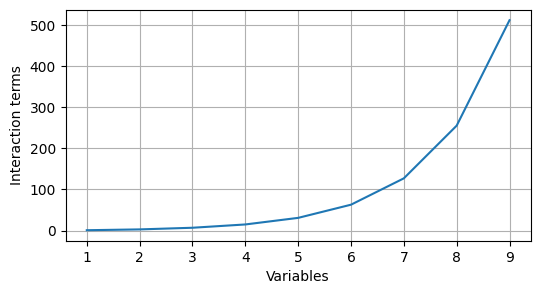

In [25]:
#| label: fig-interaction-terms
#| fig-cap: "Number of interaction terms, as a function of the number of variables. It can be seen that the number of interaction terms grows exponentially with the number of variables."
#| include: true

p_grid = range(1, 10)
vars_num = []
def get_interaction_terms(p):    
    return 2**p - 1

for i in p_grid:
    vars_num.append(get_interaction_terms(i))

plt.figure(figsize=(6, 3))
plt.plot(p_grid, vars_num)
plt.xlabel("Variables")
plt.ylabel("Interaction terms")
plt.grid(True)
plt.show()

## Machine Learning as an Alternative

To the best of the author's knowledge, there are currently no practical solutions within the traditional linear modeling framework to fully overcome the challenges of specifying and interpreting all possible non-linearities and interaction effects as the number of variables increases. This motivates the need for a different methodological approach, which is the focus of this document.
 
In this work, a methodology is proposed that combines three key elements: (1) the use of a flexible, non-parametric algorithm: Random Forests; (2) the application of interpretable machine learning techniques; and (3) the adaptation of these tools to account for the time-dependent structure of panel data. Random Forest is an ensemble learning method that aggregates the predictions of multiple decision trees to improve predictive accuracy and robustness. Unlike linear models, Random Forests do not require the analyst to specify the functional form of relationships between variables or to manually enumerate interaction terms. The algorithm naturally captures complex, nonlinear relationships and high-order interactions among features, thereby alleviating the risk of model misspecification due to omitted nonlinearities or interactions.
 
However, adopting Random Forests in the context of panel data analysis introduces two main challenges. First, the standard Random Forest algorithm assumes that all observations are independent, which is often violated in panel data where repeated measurements are taken from the same individuals over time. Second, machine learning models, including Random Forests, are frequently criticized for their lack of interpretability, as their internal workings are less transparent than those of traditional statistical models. This "black-box" nature can hinder substantive understanding and limit their adoption in applied research.
 
The first challenge, handling time dependence, will be addressed in later sections, where we discuss modifications to the modeling approach that account for the temporal structure of the data.
 
To address the second challenge, interpretability, this document introduces and demonstrates three interpretable machine learning techniques: Permutation Feature Importance (PFI), Individual Conditional Expectation (ICE) plots, and Partial Dependence Plots (PDP). PFI provides a global ranking of the importance of each independent variable by measuring the increase in prediction error when the variable's values are randomly permuted. ICE plots visualize how the predicted outcome for individual observations changes as a single feature varies, offering insight into heterogeneous effects. PDPs, on the other hand, show the average effect of one or more features on the predicted outcome, helping to reveal general patterns and marginal relationships. Together, these tools enable researchers to move beyond "black-box" predictions and gain a deeper understanding of the relationships captured by the Random Forest model, both at the global and individual level.
 
In summary, this document presents for a modern, flexible, and interpretable approach to panel data analysis that leverages the strengths of machine learning while addressing its traditional limitations in the context of social science research. In this context, it's important to notice that, although PDPs can have a causal interpretation as we will mention later, the goal of this document is not to replace the current methodologies but to provide an additional tool for applied social scientists.

## Document Structure

The remainder of this document is organized as follows. [@sec-related-work] reviews the existing literature on panel data analysis and the application of machine learning methods, with a particular emphasis on Random Forests and their use in economics and the social sciences. Sections 3, 4, and 5 will be mostly a summary of the methodology and will assume some familiarity with the concepts, Section 3 introduces the structure and key characteristics of panel data, discusses traditional modeling approaches, and highlights the challenges associated with high-dimensional and time-dependent data. Section 4 examines the limitations of conventional linear models in capturing complex relationships and interactions, thereby motivating the need for more flexible methodologies. Section 5 provides an overview of the Random Forest algorithm, outlining its advantages and potential for modeling panel data, as well as discussing its strengths and weaknesses in this context. Section 6 details methodological adaptations and strategies for applying Random Forests to panel data, addressing issues such as time dependence and repeated measurements. Section 7 presents practical examples and empirical applications to illustrate the proposed methodology, including the use of interpretable machine learning techniques. Finally, Section 8 concludes with a summary of key findings, implications for applied research, and suggestions for future work.